In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import pandas as pd

In [ ]:
def show_plot(t, ans_rightDecision, ans_numericalMethod, labels ,name):
    plt.figure()
    plt.plot(t, ans_rightDecision, 'o-k', alpha = 0.7, label = labels[0], lw = 2, mec = 'k', mew = 3, ms = 3)
    plt.plot(t, ans_numericalMethod, 'h-m', alpha = 0.7, label = labels[1], lw = 2, mec = 'k', mew = 3, ms = 3)
    plt.xlabel('Value of t')
    plt.ylabel('Value of x')
    plt.title(name)
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
def print_info(t, answer, name, z = 'nothing'):
    print(f'\n\n---------- {name} ----------')
    print(f'Координаты t: {t}')
    # print(f"Значения y'(t): {z}")
    print(f'Значение x(t): {answer}')
    print('#'*60)

In [ ]:
def calc_absolute_error(x, y, n):
    result = [abs(x[i]-y[i]) for i in range(n+1)]
    return result

In [ ]:
def create_only_plot_error(t, error, labels, name):
    plt.figure()
    plt.plot(t, error, 'o-k', alpha = 0.7, label = labels, lw = 2, mec = 'k', mew = 3, ms = 3)
    plt.xlabel('Value of t')
    plt.ylabel('Error')
    plt.title(name)
    plt.legend()
    plt.grid(True)
    plt.show()
    print('\n\n')

In [ ]:
def show_all_plots(t, ans_rightDecision, ans_numericalMethod, labels, name):
    plt.figure(figsize=(9,5))
    plt.plot(t, ans_rightDecision, 'o-k', alpha = 0.7, label = labels[0], lw = 2, mec = 'k', mew = 3, ms = 3)
    plt.plot(t, ans_numericalMethod[0], 'h-m', alpha = 0.7, label = labels[1], lw = 2, mec = 'k', mew = 3, ms = 3)
    plt.plot(t, ans_numericalMethod[1], 'x--b', alpha = 0.7, label = labels[2], lw = 2, mec = 'k', mew = 3, ms = 3)
    plt.plot(t, ans_numericalMethod[2], '+-.r', alpha = 0.7, label = labels[3], lw = 2, mec = 'k', mew = 3, ms = 3)
    plt.plot(t, ans_numericalMethod[3], 'd:g', alpha = 0.7, label = labels[4], lw = 2, mec = 'k', mew = 3, ms = 3)
    plt.xlabel('Value of t')
    plt.ylabel('Value of x')
    plt.title(name)
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
t0 = 1
x0 = 1
z0 = -1
tn = 3
h = 0.2

n = int((tn - t0) / h)
t_list = np.arange(t0, tn + h, h)
z = np.zeros([n+1])
x = np.zeros([n+1])
t = np.zeros([n+1])
z[0] = z0
x[0] = x0
t[0] = t0

In [ ]:
'''Точное решение ОДУ'''
ans_rightDecision = [round(1/12 * exp(-3 - t) * (15 * exp(4) + exp(4*t) - 4 * exp(3 + t)), 2) for t in t_list]

print_info(t_list, ans_rightDecision, name = "Точное решение ДУ")



---------- Точное решение ДУ ----------
Координаты t: [1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3. ]
Значение x(t): [1.0, 0.84, 0.78, 0.86, 1.15, 1.8, 3.09, 5.53, 10.04, 18.32, 33.45]
############################################################




---------- Решение методом Эйлера ----------
Координаты t: [1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3. ]
Значение x(t): [1.         0.8        0.68       0.648      0.7248     0.95008
 1.392448   2.1657728  3.45552128 5.56106189 8.96348129]
############################################################


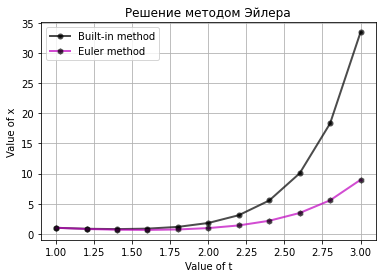

In [ ]:
'''Euler method'''
for i in range(n):
    t[i+1] = t[i] + h
    z[i+1] = z[i] + h * (2 * z[i]  + 3 * x[i] + 1)
    x[i+1] = x[i] + h * z[i]

ans_eulerMethod = x.copy()

print_info(t_list, ans_eulerMethod, name = "Решение методом Эйлера")
show_plot(t_list, ans_rightDecision, ans_eulerMethod, labels = ["Built-in method", "Euler method"], name = "Решение методом Эйлера")



---------- Решение модифицированным методом Эйлера ----------
Координаты t: [1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3. ]
Значение x(t): [ 1.          0.78        0.692       0.77164     1.10208     1.84956872
  3.32976251  6.13028719 11.33641964 20.94602843 38.63201359]
############################################################


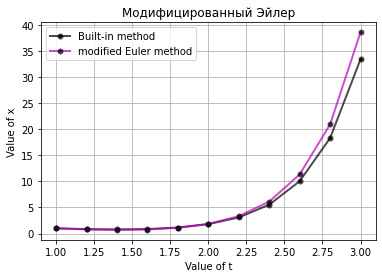

In [ ]:
'''Modified Euler method'''
for i in range(n):
    t[i+1] = t[i] + h
    z[i+1] = z[i] + h * (2 * (z[i] + h/2 * (2 * z[i] + 3 * x[i] + 1))  + 3 * (x[i] + h/2 * (2 * z[i]  + 3 * x[i] + 1)) + 1)
    x[i+1] = x[i] + h * (z[i] + h/2 * z[i])

ans_modifiedEulerMethod = x.copy()

print_info(t_list, ans_modifiedEulerMethod, name = "Решение модифицированным методом Эйлера")
show_plot(t_list, ans_rightDecision, ans_modifiedEulerMethod, labels = ["Built-in method", "modified Euler method"], name = "Модифицированный Эйлер" )



---------- Решение методом Рунге-Кутта ----------
Координаты t: [1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3. ]
Значение x(t): [ 1.          0.84186667  0.78103017  0.8562286   1.14548435  1.79701912
  3.08580779  5.51678643 10.01299978 18.25842779 33.32251989]
############################################################


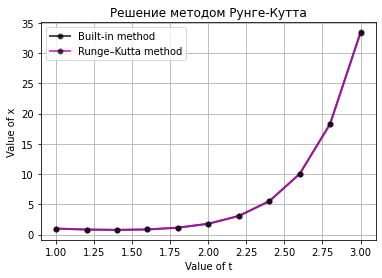

In [ ]:
'''Runge–Kutta method'''
for i in range(n):
    h2 = h / 2
    t[i+1] = t[i] + h
    m1 = z[i]
    k1 = 2 * z[i]  + 3 * x[i] + 1
    m2 = z[i] + h2 * k1
    k2 = 2 * (z[i] + h2 * k1) + 3 * (x[i] + h2 * m1) + 1
    m3 = z[i] + h2 * k2
    k3 = 2 * (z[i] + h2 * k2)  + 3 * (x[i] + h2 * m2) + 1
    m4 = z[i] + h * k3
    k4 = 2 * (z[i] + h * k3)  + 3 * (x[i] + h * m3) + 1
    z[i+1] = z[i] + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    x[i+1] = x[i] + (h / 6) * (m1 + 2 * m2 + 2 * m3 + m4)

z_rungeKuttaMethod = z.copy()
ans_rungeKuttaMethod = x.copy()


print_info(t_list, ans_rungeKuttaMethod, name = "Решение методом Рунге-Кутта")
show_plot(t_list, ans_rightDecision, ans_rungeKuttaMethod, labels = ["Built-in method", "Runge–Kutta method"], name = "Решение методом Рунге-Кутта")

In [ ]:
z = np.zeros([n+1])
z_p = np.zeros([n+1])
x = np.zeros([n+1])
x_p = np.zeros([n+1])
t = np.zeros([n+1])
z[:4] = z_rungeKuttaMethod[:4]
z_p[:4] = z_rungeKuttaMethod[:4]
x[:4] = ans_rightDecision[:4]
x_p[:4] = ans_rightDecision[:4]
t[:4] = t_list[:4]



---------- Решение методом Адамса-Мультона ----------
Координаты t: [1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3. ]
Значение x(t): [ 1.          0.84        0.78        0.86        1.14912605  1.80028823
  3.08823866  5.51656162 10.00558236 18.23337485 33.2568685 ]
############################################################


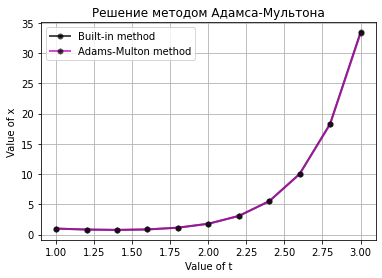

In [ ]:
'''Adams-Multon method'''
for i in range(3, n):
    t[i+1] = t[i] + h
    z_p[i+1] = z[i] + h/24 * (55 * (2 * z[i]  + 3 * x[i] + 1) - 59 * (2 * z[i-1]  + 3 * x[i-1] + 1) + 37 * (2 * z[i-2]  + 3 * x[i-2] + 1) - 9 * (2 * z[i-3]  + 3 * x[i-3] + 1))
    x_p[i+1] = x[i] + h/24 * (55 * z[i] - 59 * z[i-1] + 37 * z[i-2] - 9 * z[i-3])
    z[i+1] = z[i] + h/24 * (9 * (2 * z_p[i+1] + 3 * x_p[i+1] + 1) + 19 * (2 * z[i] + 3 * x[i] + 1) - 5 * (2 * z[i-1] + 3 * x[i-1] + 1) + (2 * z[i-2] + 3 * x[i-2] + 1))
    x[i+1] = x[i] + h/24 * (9 * z_p[i+1] + 19 * z[i] - 5 * z[i-1] + z[i-2])

ans_adamsMultonMethod = x.copy()

print_info(t_list, ans_adamsMultonMethod, name = "Решение методом Адамса-Мультона")
show_plot(t_list, ans_rightDecision, ans_adamsMultonMethod, labels = ["Built-in method", "Adams-Multon method"], name = "Решение методом Адамса-Мультона")


In [ ]:
error_eulerMethod = calc_absolute_error(ans_rightDecision, ans_eulerMethod, n)
error_modifiedEulerMethod = calc_absolute_error(ans_rightDecision, ans_modifiedEulerMethod, n)
error_rungeKuttaMethod = calc_absolute_error(ans_rightDecision, ans_rungeKuttaMethod, n)
error_adamsMultonMethod = calc_absolute_error(ans_rightDecision, ans_adamsMultonMethod, n);

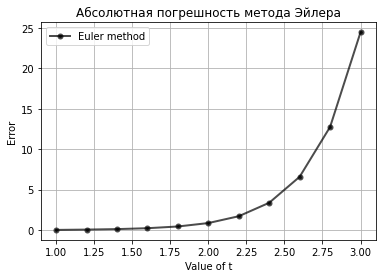

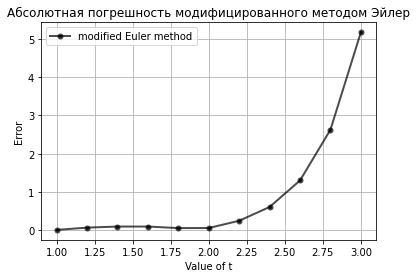

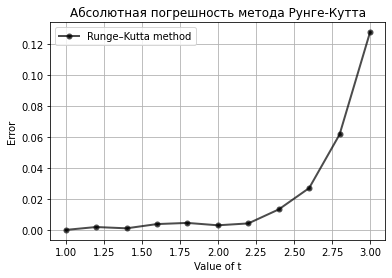

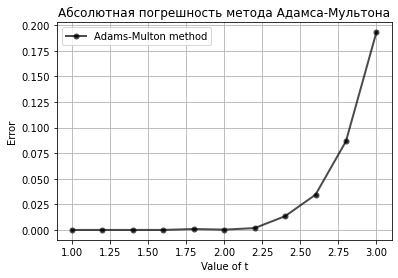

In [ ]:
create_only_plot_error(t_list, error = error_eulerMethod, labels =  "Euler method", name = "Абсолютная погрешность метода Эйлера")
create_only_plot_error(t_list, error = error_modifiedEulerMethod, labels = "modified Euler method", name = "Абсолютная погрешность модифицированного методом Эйлер")
create_only_plot_error(t_list, error = error_rungeKuttaMethod, labels = "Runge–Kutta method", name = "Абсолютная погрешность метода Рунге-Кутта")
create_only_plot_error(t_list, error = error_adamsMultonMethod, labels = "Adams-Multon method", name = "Абсолютная погрешность метода Адамса-Мультона")

In [ ]:
data = { 't': t_list,
        'Точное решение': ans_rightDecision,
        'Метод Эйлера': ans_eulerMethod,
        'Модифицированный метод Эйлера': ans_modifiedEulerMethod,
        'Метод Рунге-Кутта': ans_rungeKuttaMethod,
        'Метод Адамса-Мультона': ans_adamsMultonMethod
        }
np.round(pd.DataFrame(data), 4)

,t,Точное решение,Метод Эйлера,Модифицированный метод Эйлера,Метод Рунге-Кутта,Метод Адамса-Мультона
0,1.0,1.00,1.0000,1.0000,1.0000,1.0000
1,1.2,0.84,0.8000,0.7800,0.8419,0.8400
2,1.4,0.78,0.6800,0.6920,0.7810,0.7800
3,1.6,0.86,0.6480,0.7716,0.8562,0.8600
4,1.8,1.15,0.7248,1.1021,1.1455,1.1491
5,2.0,1.80,0.9501,1.8496,1.7970,1.8003
6,2.2,3.09,1.3924,3.3298,3.0858,3.0882
7,2.4,5.53,2.1658,6.1303,5.5168,5.5166
8,2.6,10.04,3.4555,11.3364,10.0130,10.0056
9,2.8,18.32,5.5611,20.9460,18.2584,18.2334


In [ ]:
data = { 't': t_list,
        'Δ метод Эйлера': error_eulerMethod,
        'Δ модифицированный метод Эйлера': error_modifiedEulerMethod,
        'Δ метод Рунге-Кутта': error_rungeKuttaMethod,
        'Δ метод Адамса-Мультона': error_adamsMultonMethod
        }
np.round(pd.DataFrame(data), 4)

,t,Δ метод Эйлера,Δ модифицированный метод Эйлера,Δ метод Рунге-Кутта,Δ метод Адамса-Мультона
0,1.0,0.0000,0.0000,0.0000,0.0000
1,1.2,0.0400,0.0600,0.0019,0.0000
2,1.4,0.1000,0.0880,0.0010,0.0000
3,1.6,0.2120,0.0884,0.0038,0.0000
4,1.8,0.4252,0.0479,0.0045,0.0009
5,2.0,0.8499,0.0496,0.0030,0.0003
6,2.2,1.6976,0.2398,0.0042,0.0018
7,2.4,3.3642,0.6003,0.0132,0.0134
8,2.6,6.5845,1.2964,0.0270,0.0344
9,2.8,12.7589,2.6260,0.0616,0.0866


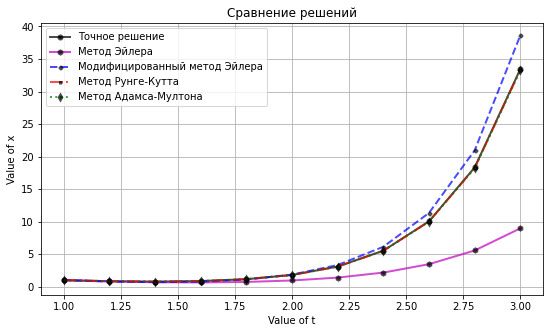

In [ ]:
solutions = [ans_eulerMethod, ans_modifiedEulerMethod, ans_rungeKuttaMethod, ans_adamsMultonMethod]
labels = ['Точное решение', 'Метод Эйлера', 'Модифицированный метод Эйлера', 'Метод Рунге-Кутта', 'Метод Адамса-Мултона']
show_all_plots(t_list, ans_rightDecision, solutions, labels, name='Сравнение решений')

In [ ]:
data = { 't': t_list,
        'Δ метод Эйлера': error_eulerMethod,
        'Δ модифицированный метод Эйлера': error_modifiedEulerMethod,
        'Δ метод Рунге-Кутта': error_rungeKuttaMethod,
        'Δ метод Адамса-Мультона': error_adamsMultonMethod
        }
np.round(pd.DataFrame(data), 4)

,t,Δ метод Эйлера,Δ модифицированный метод Эйлера,Δ метод Рунге-Кутта,Δ метод Адамса-Мультона
0,1.0,0.0000,0.0000,0.0000,0.0000
1,1.2,0.0400,0.0600,0.0019,0.0000
2,1.4,0.1000,0.0880,0.0010,0.0000
3,1.6,0.2120,0.0884,0.0038,0.0000
4,1.8,0.4252,0.0479,0.0045,0.0009
5,2.0,0.8499,0.0496,0.0030,0.0003
6,2.2,1.6976,0.2398,0.0042,0.0018
7,2.4,3.3642,0.6003,0.0132,0.0134
8,2.6,6.5845,1.2964,0.0270,0.0344
9,2.8,12.7589,2.6260,0.0616,0.0866
